In [1]:
%matplotlib inline
import numpy as np
from math import pi
from triqs.gf import *
from h5 import *
from triqs.plot.mpl_interface import plt,oplot
import matplotlib as mpl
mpl.rcParams['savefig.dpi']=100 

Solution of the exercises
=========================

Solution of exercise 1
----------------------

The solution of this exercise is in the script called `run_single_band.py` in the tutorial directory. View it by executing the command below. 

In [2]:
# %load run_single_band.py
from triqs.gf import *
from triqs.operators import *
from h5 import *
from triqs_cthyb import Solver
import numpy as np

import os
if not os.path.exists('results_one_band'):
    os.makedirs('results_one_band')

# Parameters of the model
t = 1.0
beta = 10.0
n_loops = 10

# Construct the impurity solver
S = Solver(beta = beta, gf_struct = [('up',[0]), ('down',[0])] )

# I run for several values of U
for U in np.arange(1.0, 13.0):
    print('U =', U)

    # This is a first guess for G
    S.G_iw << SemiCircular(2*t)

    # DMFT loop with self-consistency
    for i in range(n_loops):
    
        print("\n\nIteration = %i / %i" % (i+1, n_loops))
    
        # Symmetrize the Green's function and use self-consistency
        g = 0.5 * ( S.G_iw['up'] + S.G_iw['down'] )
        for name, g0 in S.G0_iw:
            g0 << inverse( iOmega_n + U/2.0 - t**2 * g )

        # Solve the impurity problem
        S.solve(h_int = U * n('up',0) * n('down',0),   # Local Hamiltonian 
            n_cycles  = 10000,                           # Number of QMC cycles
            n_warmup_cycles = 5000,                      # Warmup cycles
            )
    
        # Save iteration in archive
        with HDFArchive("results_one_band/half-U%.2f.h5"%U) as A:
            A['G-%i'%i] = S.G_iw
            A['Sigma-%i'%i] = S.Sigma_iw


Starting run with 1 MPI rank(s) at : 2022-04-25 14:35:15.196177


U = 1.0


Iteration = 1 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-0.5*c_dag('down',0)*c('down',0) + -0.5*c_dag('up',0)*c('up',0) + 1*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:35:15   6% ETA 00:00:01 cycle 341 of 5000



Accumulating ...
14:35:16   5% ETA 00:00:01 cycle 552 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00733643
G_tau measure      | 0.0235905 
Total measure time | 0.030927  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.134232
  Move  Insert Delta_up: 0.134665
  Move  Insert Delta_down: 0.133798
Move set Remove two operators: 0.135167
  Move  Remove Delta_up: 0.136203
  Move  Remove Delta_down: 0.1341

     .... max_element |g(0) + g(beta) + 1| = 0.209679
     .... max_element |g(0) + g(beta) + 1| = 0.0723132
     .... max_element |g(0) + g(beta) + 1| = 

e  Insert Delta_down_up: 0.0190731
  Move  Insert Delta_down_down: 0.0275798
Move set Remove four operators: 0.023537
  Move  Remove Delta_up_up: 0.0268679
  Move  Remove Delta_up_down: 0.0196535
  Move  Remove Delta_down_up: 0.020071
  Move  Remove Delta_down_down: 0.0276143
Move  Shift one operator: 0.838461
[Rank 0] Warmup lasted: 0.918139 seconds [00:00:00]
[Rank 0] Simulation lasted: 1.91562 seconds [00:00:01]
[Rank 0] Number of measures: 10000
Total number of measures: 10000
Average sign: 1


Iteration = 2 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-0.5*c_dag('down',0)*c('down',0) + -0.5*c_dag('up',0)*c('up',0) + 1*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:35:18   6% ETA 00:00:01 cycle 348 of 5000



Accumulating ...
14:35:19   5% ETA 00:00:01 cycle 564 of 10000


[Rank 

0.0222349
     .... max_element |g(0) + g(beta) + 1| = 0.133129




Iteration = 3 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘



     .... max_element |g(0) + g(beta) + 1| = 0.238494
     .... max_element |g(0) + g(beta) + 1| = 

The local Hamiltonian of the problem:
-0.5*c_dag('down',0)*c('down',0) + -0.5*c_dag('up',0)*c('up',0) + 1*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:35:21   6% ETA 00:00:01 cycle 344 of 5000



Accumulating ...
14:35:22   6% ETA 00:00:01 cycle 603 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00665299
G_tau measure      | 0.020432  
Total measure time | 0.0270849 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.137234
  Move  Insert Delta_up: 0.137731
  Move  Insert Delta_down: 0.136734
Move set Remove two operators: 0.137938
  Move  Remove Delta_up: 0.137883
  Move  Remove Delta_down: 0.137993
Move set Insert four operators: 0.0248513
  Move  Insert Delta_up_up: 0.0289088
  Move  Insert Delta_up_down: 0.0206219
  Mo

0.283201
     .... max_element |g(0) + g(beta) + 1| = 0.166283
     .... max_element |g(0) + g(beta) + 1| = 0.334893
     .... max_element |g(0) + g(beta) + 1| = 0.0994583




Iteration = 5 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-0.5*c_dag('down',0)*c('down',0) + -0.5*c_dag('up',0)*c('up',0) + 1*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:35:26   6% ETA 00:00:01 cycle 343 of 5000



Accumulating ...
14:35:27   5% ETA 00:00:01 cycle 553 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00657303
G_tau measure      | 0.0197399 
Total measure time | 0.026313  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.13542
  Move  Insert Delta_up: 0.134946
  Move  Insert Delta_down: 0.135898
Move set Remove two operators: 0.136317
  Move  Remove Delta_up: 0.138209
  Move  Remove Delta_down: 0.134423
Move s

     .... max_element |g(0) + g(beta) + 1| = 0.206507
     .... max_element |g(0) + g(beta) + 1| = 0.0274826


The local Hamiltonian of the problem:
-0.5*c_dag('down',0)*c('down',0) + -0.5*c_dag('up',0)*c('up',0) + 1*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:35:29   6% ETA 00:00:01 cycle 343 of 5000



Accumulating ...
14:35:30   5% ETA 00:00:01 cycle 537 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00657372
G_tau measure      | 0.0195968 
Total measure time | 0.0261706 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.138785
  Move  Insert Delta_up: 0.138071
  Move  Insert Delta_down: 0.139503
Move set Remove two operators: 0.137522
  Move  Remove Delta_up: 0.138522
  Move  Remove Delta_down: 0.136522
Move set Insert four operators: 0.0246442
  Move  Insert Delta_up_up: 0.0290329
  Move  Insert Delta_up_down: 0.0211366
  Mo

     .... max_element |g(0) + g(beta) + 1| = 0.0703379
     .... max_element |g(0) + g(beta) + 1| = 0.362302
     .... max_element |g(0) + g(beta) + 1| = 


╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-0.5*c_dag('down',0)*c('down',0) + -0.5*c_dag('up',0)*c('up',0) + 1*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:35:32   7% ETA 00:00:01 cycle 349 of 5000



Accumulating ...
14:35:33   5% ETA 00:00:01 cycle 582 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.0064318 
G_tau measure      | 0.0199044 
Total measure time | 0.0263362 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.13751
  Move  Insert Delta_up: 0.137827
  Move  Insert Delta_down: 0.137191
Move set Remove two operators: 0.137397
  Move  Remove Delta_up: 0.138587
  Move  Remove Delta_down: 0.136205
Move set Insert four operat

0.14157
     .... max_element |g(0) + g(beta) + 1| = 0.168885
     .... max_element |g(0) + g(beta) + 1| = 0.0206778
     .... max_element |g(0) + g(beta) + 1| = 0.0803447




Iteration = 9 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-0.5*c_dag('down',0)*c('down',0) + -0.5*c_dag('up',0)*c('up',0) + 1*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:35:37   6% ETA 00:00:01 cycle 343 of 5000



Accumulating ...
14:35:38   6% ETA 00:00:01 cycle 628 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00635321
G_tau measure      | 0.0190175 
Total measure time | 0.0253707 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.137291
  Move  Insert Delta_up: 0.137669
  Move  Insert Delta_down: 0.136912
Move set Remove two operators: 0.136937
  Move  Remove Delta_up: 0.136943
  Move  Remove Delta_down: 0.136932
Move 

     .... max_element |g(0) + g(beta) + 1| = 0.219936
     .... max_element |g(0) + g(beta) + 1| = 0.0710841
     .... max_element |g(0) + g(beta) + 1| = 0.420256
     .... max_element |g(0) + g(beta) + 1| = 0.20294
     .... max_element |g(0) + g(beta) + 1| = 



Iteration = 2 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘



0.107847
     .... max_element |g(0) + g(beta) + 1| = 0.399664


The local Hamiltonian of the problem:
-1*c_dag('down',0)*c('down',0) + -1*c_dag('up',0)*c('up',0) + 2*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:35:45   8% ETA 00:00:01 cycle 404 of 5000



Accumulating ...
14:35:46   4% ETA 00:00:01 cycle 493 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00683262
G_tau measure      | 0.0199469 
Total measure time | 0.0267795 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.132289
  Move  Insert Delta_up: 0.130974
  Move  Insert Delta_down: 0.133611
Move set Remove two operators: 0.131552
  Move  Remove Delta_up: 0.131438
  Move  Remove Delta_down: 0.131666
Move set Insert four operators: 0.0277007
  Move  Insert Delta_up_up: 0.0293445
  Move  Insert Delta_up_down: 0.0254622
  Move  

     .... max_element |g(0) + g(beta) + 1| = 0.0102077
     .... max_element |g(0) + g(beta) + 1| = 0.326317



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-1*c_dag('down',0)*c('down',0) + -1*c_dag('up',0)*c('up',0) + 2*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:35:48   7% ETA 00:00:01 cycle 354 of 5000



Accumulating ...
14:35:49   6% ETA 00:00:01 cycle 680 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00648129
G_tau measure      | 0.0184069 
Total measure time | 0.0248882 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.128751
  Move  Insert Delta_up: 0.128885
  Move  Insert Delta_down: 0.128617
Move set Remove two operators: 0.128463
  Move  Remove Delta_up: 0.129211
  Move  Remove Delta_down: 0.127713
Move set Insert four operators

     .... max_element |g(0) + g(beta) + 1| = 0.117365
     .... max_element |g(0) + g(beta) + 1| = 0.251734



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-1*c_dag('down',0)*c('down',0) + -1*c_dag('up',0)*c('up',0) + 2*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:35:50   7% ETA 00:00:01 cycle 356 of 5000



Accumulating ...
14:35:51   6% ETA 00:00:01 cycle 673 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00643428
G_tau measure      | 0.0180902 
Total measure time | 0.0245245 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.129815
  Move  Insert Delta_up: 0.128922
  Move  Insert Delta_down: 0.130713
Move set Remove two operators: 0.131028
  Move  Remove Delta_up: 0.131495
  Move  Remove Delta_down: 0.130562
Move set Insert four operators

     .... max_element |g(0) + g(beta) + 1| = 0.223019
     .... max_element |g(0) + g(beta) + 1| = 0.416522
     .... max_element |g(0) + g(beta) + 1| = 0.241288



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-1*c_dag('down',0)*c('down',0) + -1*c_dag('up',0)*c('up',0) + 2*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:35:55   8% ETA 00:00:01 cycle 403 of 5000



Accumulating ...
14:35:56   6% ETA 00:00:01 cycle 622 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00653016
G_tau measure      | 0.0176658 
Total measure time | 0.024196  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.132093
  Move  Insert Delta_up: 0.132164
  Move  Insert Delta_down: 0.132021
Move set Remove two operators: 0.131692
  Move  Remove Delta_up: 0.132505
  Move  Remove Delta_down: 0.130874
Move set Insert four operators

     .... max_element |g(0) + g(beta) + 1| = 0.291092
     .... max_element |g(0) + g(beta) + 1| = 0.301403



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-1*c_dag('down',0)*c('down',0) + -1*c_dag('up',0)*c('up',0) + 2*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:35:58   7% ETA 00:00:01 cycle 373 of 5000



Accumulating ...
14:35:59   5% ETA 00:00:01 cycle 561 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00695247
G_tau measure      | 0.0188762 
Total measure time | 0.0258287 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.12924
  Move  Insert Delta_up: 0.129239
  Move  Insert Delta_down: 0.12924
Move set Remove two operators: 0.130954
  Move  Remove Delta_up: 0.132561
  Move  Remove Delta_down: 0.12935
Move set Insert four operators: 0

     .... max_element |g(0) + g(beta) + 1| = 0.28662
     .... max_element |g(0) + g(beta) + 1| = 0.141409


The local Hamiltonian of the problem:
-1*c_dag('down',0)*c('down',0) + -1*c_dag('up',0)*c('up',0) + 2*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:00   7% ETA 00:00:01 cycle 381 of 5000



Accumulating ...
14:36:01   6% ETA 00:00:01 cycle 657 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00647223
G_tau measure      | 0.0183171 
Total measure time | 0.0247893 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.1302
  Move  Insert Delta_up: 0.129648
  Move  Insert Delta_down: 0.130757
Move set Remove two operators: 0.130271
  Move  Remove Delta_up: 0.130034
  Move  Remove Delta_down: 0.130509
Move set Insert four operators: 0.0264081
  Move  Insert Delta_up_up: 0.0281779
  Move  Insert Delta_up_down: 0.024126
  Move  Ins

     .... max_element |g(0) + g(beta) + 1| = 0.144728


The local Hamiltonian of the problem:
-1*c_dag('down',0)*c('down',0) + -1*c_dag('up',0)*c('up',0) + 2*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:03   6% ETA 00:00:01 cycle 310 of 5000



Accumulating ...
14:36:04   6% ETA 00:00:01 cycle 645 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00615361
G_tau measure      | 0.0174473 
Total measure time | 0.0236009 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.129558
  Move  Insert Delta_up: 0.129461
  Move  Insert Delta_down: 0.129655
Move set Remove two operators: 0.128955
  Move  Remove Delta_up: 0.129716
  Move  Remove Delta_down: 0.128191
Move set Insert four operators: 0.0264616
  Move  Insert Delta_up_up: 0.0284899
  Move  Insert Delta_up_down: 0.0236653
  Move  

     .... max_element |g(0) + g(beta) + 1| = 0.175032
     .... max_element |g(0) + g(beta) + 1| = 0.140167


The local Hamiltonian of the problem:
-1*c_dag('down',0)*c('down',0) + -1*c_dag('up',0)*c('up',0) + 2*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:05   5% ETA 00:00:01 cycle 264 of 5000



Accumulating ...
14:36:06   6% ETA 00:00:01 cycle 632 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00656872
G_tau measure      | 0.0188639 
Total measure time | 0.0254326 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.129767
  Move  Insert Delta_up: 0.130558
  Move  Insert Delta_down: 0.128968
Move set Remove two operators: 0.130373
  Move  Remove Delta_up: 0.130947
  Move  Remove Delta_down: 0.129797
Move set Insert four operators: 0.0271572
  Move  Insert Delta_up_up: 0.0288375
  Move  Insert Delta_up_down: 0.0247059
  Move  

     .... max_element |g(0) + g(beta) + 1| = 0.0408837
     .... max_element |g(0) + g(beta) + 1| = 0.0165894
     .... max_element |g(0) + g(beta) + 1| = 0.22247
     .... max_element |g(0) + g(beta) + 1| = 0.637068



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-1.5*c_dag('down',0)*c('down',0) + -1.5*c_dag('up',0)*c('up',0) + 3*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:10   8% ETA 00:00:01 cycle 430 of 5000



Accumulating ...
14:36:11   7% ETA 00:00:01 cycle 729 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00674993
G_tau measure      | 0.0157143 
Total measure time | 0.0224642 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.119869
  Move  Insert Delta_up: 0.119451
  Move  Insert Delta_down: 0.120289
Move set Remove two operators: 0.118575
  Move  Remove Delta_up: 0.118659
  Move  Remove Delta_down: 0.11849
Move set Insert four operat

     .... max_element |g(0) + g(beta) + 1| = 0.196358
     .... max_element |g(0) + g(beta) + 1| = 0.26048
     .... max_element |g(0) + g(beta) + 1| = 0.0813553


ve  Insert Delta_down_up: 0.0286614
  Move  Insert Delta_down_down: 0.0261207
Move set Remove four operators: 0.0271465
  Move  Remove Delta_up_up: 0.0269045
  Move  Remove Delta_up_down: 0.0285562
  Move  Remove Delta_down_up: 0.0281961
  Move  Remove Delta_down_down: 0.0249268
Move  Shift one operator: 0.506212
[Rank 0] Warmup lasted: 0.704912 seconds [00:00:00]
[Rank 0] Simulation lasted: 1.28188 seconds [00:00:01]
[Rank 0] Number of measures: 10000
Total number of measures: 10000
Average sign: 1


Iteration = 5 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-1.5*c_dag('down',0)*c('down',0) + -1.5*c_dag('up',0)*c('up',0) + 3*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:17   8% ETA 00:00:01 cycle 434 of 5000



Accumulating ...
14:36:17   8% ETA 00:00:01 cycle 814 of 10000


[Ra

     .... max_element |g(0) + g(beta) + 1| = 0.121743
     .... max_element |g(0) + g(beta) + 1| = 0.335509
     .... max_element |g(0) + g(beta) + 1| = 0.0912463




Iteration = 6 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-1.5*c_dag('down',0)*c('down',0) + -1.5*c_dag('up',0)*c('up',0) + 3*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:19   7% ETA 00:00:01 cycle 391 of 5000



Accumulating ...
14:36:19   7% ETA 00:00:01 cycle 783 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00623994
G_tau measure      | 0.0151986 
Total measure time | 0.0214386 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.11915
  Move  Insert Delta_up: 0.119079
  Move  Insert Delta_down: 0.119221
Move set Remove two operators: 0.119022
  Move  Remove Delta_up: 0.118646
  Move  Remove Delta_down: 0.119399
Move s

     .... max_element |g(0) + g(beta) + 1| = 0.0574116
     .... max_element |g(0) + g(beta) + 1| = 0.0343103




Iteration = 7 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-1.5*c_dag('down',0)*c('down',0) + -1.5*c_dag('up',0)*c('up',0) + 3*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:21   9% ETA 00:00:00 cycle 459 of 5000



Accumulating ...
14:36:22   6% ETA 00:00:01 cycle 688 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00624848
G_tau measure      | 0.0150428 
Total measure time | 0.0212913 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.118672
  Move  Insert Delta_up: 0.119878
  Move  Insert Delta_down: 0.117462
Move set Remove two operators: 0.11827
  Move  Remove Delta_up: 0.119741
  Move  Remove Delta_down: 0.116791
Move s

     .... max_element |g(0) + g(beta) + 1| = 0.117267
     .... max_element |g(0) + g(beta) + 1| = 0.129972




Iteration = 8 / 10


     .... max_element |g(0) + g(beta) + 1| = 0.0339563
     .... max_element |g(0) + g(beta) + 1| = 0.399455



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-1.5*c_dag('down',0)*c('down',0) + -1.5*c_dag('up',0)*c('up',0) + 3*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:23   8% ETA 00:00:01 cycle 443 of 5000



Accumulating ...
14:36:24   7% ETA 00:00:01 cycle 751 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00617395
G_tau measure      | 0.0151426 
Total measure time | 0.0213165 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.11923
  Move  Insert Delta_up: 0.119348
  Move  Insert Delta_down: 0.119112
Move set Remove two operators: 0.12
  Move  Remove Delta_up: 0.120168
  Move  Remove Delta_down: 0.119832
Move set Insert four operators:

     .... max_element |g(0) + g(beta) + 1| = 0.239917
     .... max_element |g(0) + g(beta) + 1| = 0.0471111
     .... max_element |g(0) + g(beta) + 1| = 0.29744
     .... max_element |g(0) + g(beta) + 1| = 0.0416535



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-1.5*c_dag('down',0)*c('down',0) + -1.5*c_dag('up',0)*c('up',0) + 3*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:27   4% ETA 00:00:02 cycle 210 of 5000



Accumulating ...
14:36:28   7% ETA 00:00:01 cycle 716 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00623655
G_tau measure      | 0.0151016 
Total measure time | 0.0213381 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.119445
  Move  Insert Delta_up: 0.119359
  Move  Insert Delta_down: 0.119532
Move set Remove two operators: 0.120342
  Move  Remove Delta_up: 0.121484
  Move  Remove Delta_down: 0.119198
Move set Insert four opera

     .... max_element |g(0) + g(beta) + 1| = 0.130501
     .... max_element |g(0) + g(beta) + 1| = 0.222244


The local Hamiltonian of the problem:
-2*c_dag('down',0)*c('down',0) + -2*c_dag('up',0)*c('up',0) + 4*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:29   9% ETA 00:00:00 cycle 460 of 5000



Accumulating ...
14:36:30   8% ETA 00:00:01 cycle 849 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00612946
G_tau measure      | 0.0148153 
Total measure time | 0.0209448 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.102563
  Move  Insert Delta_up: 0.101947
  Move  Insert Delta_down: 0.103185
Move set Remove two operators: 0.102725
  Move  Remove Delta_up: 0.103145
  Move  Remove Delta_down: 0.102302
Move set Insert four operators: 0.0205236
  Move  Insert Delta_up_up: 0.0207993
  Move  Insert Delta_up_down: 0.0210456
  Move  

     .... max_element |g(0) + g(beta) + 1| = 0.309449


The local Hamiltonian of the problem:
-2*c_dag('down',0)*c('down',0) + -2*c_dag('up',0)*c('up',0) + 4*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:31  10% ETA 00:00:00 cycle 526 of 5000



Accumulating ...
14:36:32   9% ETA 00:00:00 cycle 952 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00595891
G_tau measure      | 0.0119568 
Total measure time | 0.0179158 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.110476
  Move  Insert Delta_up: 0.110894
  Move  Insert Delta_down: 0.110056
Move set Remove two operators: 0.110077
  Move  Remove Delta_up: 0.110688
  Move  Remove Delta_down: 0.109469
Move set Insert four operators: 0.0245084
  Move  Insert Delta_up_up: 0.0203979
  Move  Insert Delta_up_down: 0.0278363
  Move  

     .... max_element |g(0) + g(beta) + 1| = 0.341096
     .... max_element |g(0) + g(beta) + 1| = 0.156885
     .... max_element |g(0) + g(beta) + 1| = 0.0356298




Iteration = 4 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-2*c_dag('down',0)*c('down',0) + -2*c_dag('up',0)*c('up',0) + 4*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:35  10% ETA 00:00:00 cycle 532 of 5000



Accumulating ...
14:36:35   9% ETA 00:00:01 cycle 908 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00591219
G_tau measure      | 0.0111748 
Total measure time | 0.017087  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.108673
  Move  Insert Delta_up: 0.107928
  Move  Insert Delta_down: 0.109423
Move set Remove two operators: 0.108521
  Move  Remove Delta_up: 0.109383
  Move  Remove Delta_down: 0.10766
Move set I

     .... max_element |g(0) + g(beta) + 1| = 0.0414456




Iteration = 5 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-2*c_dag('down',0)*c('down',0) + -2*c_dag('up',0)*c('up',0) + 4*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:37  11% ETA 00:00:00 cycle 596 of 5000



Accumulating ...
14:36:37  10% ETA 00:00:00 cycle 1042 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00641449
G_tau measure      | 0.0114448 
Total measure time | 0.0178593 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.110552
  Move  Insert Delta_up: 0.110747
  Move  Insert Delta_down: 0.110357
Move set Remove two operators: 0.110741
  Move  Remove Delta_up: 0.112304
  Move  Remove Delta_down: 0.109186
Move set

     .... max_element |g(0) + g(beta) + 1| = 0.236069
     .... max_element |g(0) + g(beta) + 1| = 0.336404


Insert Delta_down_up: 0.0298174
  Move  Insert Delta_down_down: 0.0201294
Move set Remove four operators: 0.0250697
  Move  Remove Delta_up_up: 0.019773
  Move  Remove Delta_up_down: 0.0301772
  Move  Remove Delta_down_up: 0.0290575
  Move  Remove Delta_down_down: 0.0212375
Move  Shift one operator: 0.294964
[Rank 0] Warmup lasted: 0.526007 seconds [00:00:00]
[Rank 0] Simulation lasted: 1.03733 seconds [00:00:01]
[Rank 0] Number of measures: 10000
Total number of measures: 10000
Average sign: 1


Iteration = 6 / 10


     .... max_element |g(0) + g(beta) + 1| = 0.436413
     .... max_element |g(0) + g(beta) + 1| = 0.446816



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-2*c_dag('down',0)*c('down',0) + -2*c_dag('up',0)*c('up',0) + 4*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:38  11% ETA 00:00:00 cycle 558 of 5000



Accumulating ...
14:36:39  10% ETA 00:00:00 cycle 1021 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00597894
G_tau measure      | 0.0109528 
Total measure time | 0.0169318 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.108559
  Move  Insert Delta_up: 0.10842
  Move  Insert Delta_down: 0.108699
Move set Remove two operators: 0.110331
  Move  Remove Delta_up: 0.110928
  Move  Remove Delta_down: 0.109737
Move set Insert four operators

     .... max_element |g(0) + g(beta) + 1| = 0.209338
     .... max_element |g(0) + g(beta) + 1| = 0.0666581



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-2*c_dag('down',0)*c('down',0) + -2*c_dag('up',0)*c('up',0) + 4*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:40  12% ETA 00:00:00 cycle 608 of 5000



Accumulating ...
14:36:40  10% ETA 00:00:00 cycle 1093 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00612682
G_tau measure      | 0.0113303 
Total measure time | 0.0174571 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.109679
  Move  Insert Delta_up: 0.109186
  Move  Insert Delta_down: 0.110176
Move set Remove two operators: 0.110687
  Move  Remove Delta_up: 0.111635
  Move  Remove Delta_down: 0.109744
Move set Insert four operator

     .... max_element |g(0) + g(beta) + 1| = 0.552036
     .... max_element |g(0) + g(beta) + 1| = 0.424891
     .... max_element |g(0) + g(beta) + 1| = 0.159941
     .... max_element |g(0) + g(beta) + 1| = 0.0649913



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-2*c_dag('down',0)*c('down',0) + -2*c_dag('up',0)*c('up',0) + 4*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:43  11% ETA 00:00:00 cycle 563 of 5000



Accumulating ...
14:36:44   9% ETA 00:00:00 cycle 914 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.0063976 
G_tau measure      | 0.0114327 
Total measure time | 0.0178303 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.108973
  Move  Insert Delta_up: 0.108881
  Move  Insert Delta_down: 0.109066
Move set Remove two operators: 0.108479
  Move  Remove Delta_up: 0.109093
  Move  Remove Delta_down: 0.107869
Move set Insert four operators

     .... max_element |g(0) + g(beta) + 1| = 0.210624
     .... max_element |g(0) + g(beta) + 1| = 0.224387



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-2*c_dag('down',0)*c('down',0) + -2*c_dag('up',0)*c('up',0) + 4*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:45   6% ETA 00:00:01 cycle 327 of 5000



Accumulating ...
14:36:45   9% ETA 00:00:00 cycle 987 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00640338
G_tau measure      | 0.0115908 
Total measure time | 0.0179942 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.109523
  Move  Insert Delta_up: 0.110571
  Move  Insert Delta_down: 0.108474
Move set Remove two operators: 0.110708
  Move  Remove Delta_up: 0.112113
  Move  Remove Delta_down: 0.109309
Move set Insert four operators

     .... max_element |g(0) + g(beta) + 1| = 0.619027
     .... max_element |g(0) + g(beta) + 1| = 0.738093


The local Hamiltonian of the problem:
-2.5*c_dag('down',0)*c('down',0) + -2.5*c_dag('up',0)*c('up',0) + 5*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:46  10% ETA 00:00:00 cycle 525 of 5000



Accumulating ...
14:36:47   9% ETA 00:00:00 cycle 911 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00659324
G_tau measure      | 0.0145314 
Total measure time | 0.0211246 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0931403
  Move  Insert Delta_up: 0.0931619
  Move  Insert Delta_down: 0.0931184
Move set Remove two operators: 0.0933456
  Move  Remove Delta_up: 0.0934672
  Move  Remove Delta_down: 0.0932237
Move set Insert four operators: 0.0175091
  Move  Insert Delta_up_up: 0.0159501
  Move  Insert Delta_up_down: 0.018447

     .... max_element |g(0) + g(beta) + 1| = 0.405598
     .... max_element |g(0) + g(beta) + 1| = 0.215013



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-2.5*c_dag('down',0)*c('down',0) + -2.5*c_dag('up',0)*c('up',0) + 5*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:48   6% ETA 00:00:01 cycle 329 of 5000



Accumulating ...
14:36:49  11% ETA 00:00:00 cycle 1193 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00642586
G_tau measure      | 0.0106767 
Total measure time | 0.0171026 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0996055
  Move  Insert Delta_up: 0.0995299
  Move  Insert Delta_down: 0.0996815
Move set Remove two operators: 0.0995882
  Move  Remove Delta_up: 0.100518
  Move  Remove Delta_down: 0.0986599
Move set Insert four

     .... max_element |g(0) + g(beta) + 1| = 0.395226
     .... max_element |g(0) + g(beta) + 1| = 0.030821



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-2.5*c_dag('down',0)*c('down',0) + -2.5*c_dag('up',0)*c('up',0) + 5*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:50  16% ETA 00:00:00 cycle 838 of 5000



Accumulating ...
14:36:50  13% ETA 00:00:00 cycle 1323 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00596354
G_tau measure      | 0.00923836
Total measure time | 0.0152019 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0985347
  Move  Insert Delta_up: 0.0983328
  Move  Insert Delta_down: 0.0987386
Move set Remove two operators: 0.098615
  Move  Remove Delta_up: 0.0987304
  Move  Remove Delta_down: 0.0985001
Move set Insert four

     .... max_element |g(0) + g(beta) + 1| = 0.586484
     .... max_element |g(0) + g(beta) + 1| = 0.143472
     .... max_element |g(0) + g(beta) + 1| = 0.166591
     .... max_element |g(0) + g(beta) + 1| = 0.167624


The local Hamiltonian of the problem:
-2.5*c_dag('down',0)*c('down',0) + -2.5*c_dag('up',0)*c('up',0) + 5*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:51  14% ETA 00:00:00 cycle 742 of 5000



Accumulating ...
14:36:51  14% ETA 00:00:00 cycle 1458 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00588461
G_tau measure      | 0.00862486
Total measure time | 0.0145095 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0943408
  Move  Insert Delta_up: 0.0931486
  Move  Insert Delta_down: 0.0955452
Move set Remove two operators: 0.0946588
  Move  Remove Delta_up: 0.0949316
  Move  Remove Delta_down: 0.094388
Move set Insert four operators: 0.0172589
  Move  Insert Delta_up_up: 0.0145103
  Move  Insert Delta_up_down: 0.021024

     .... max_element |g(0) + g(beta) + 1| = 0.734134
     .... max_element |g(0) + g(beta) + 1| = 0.434786
     .... max_element |g(0) + g(beta) + 1| = 0.414382
     .... max_element |g(0) + g(beta) + 1| = 0.37315




Iteration = 8 / 10


     .... max_element |g(0) + g(beta) + 1| = 0.647127
     .... max_element |g(0) + g(beta) + 1| = 0.572497



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-2.5*c_dag('down',0)*c('down',0) + -2.5*c_dag('up',0)*c('up',0) + 5*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:56  14% ETA 00:00:00 cycle 737 of 5000



Accumulating ...
14:36:57  14% ETA 00:00:00 cycle 1479 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00598614
G_tau measure      | 0.00885894
Total measure time | 0.0148451 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0922585
  Move  Insert Delta_up: 0.0920631
  Move  Insert Delta_down: 0.0924548
Move set Remove two operators: 0.0916992
  Move  Remove Delta_up: 0.0922658
  Move  Remove Delta_down: 0.0911368
Move set Insert fou

     .... max_element |g(0) + g(beta) + 1| = 0.324238
     .... max_element |g(0) + g(beta) + 1| = 0.145135



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-2.5*c_dag('down',0)*c('down',0) + -2.5*c_dag('up',0)*c('up',0) + 5*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:36:59  16% ETA 00:00:00 cycle 829 of 5000



Accumulating ...
14:36:59  15% ETA 00:00:00 cycle 1547 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00594325
G_tau measure      | 0.00846363
Total measure time | 0.0144069 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0924975
  Move  Insert Delta_up: 0.0919215
  Move  Insert Delta_down: 0.0930739
Move set Remove two operators: 0.0928491
  Move  Remove Delta_up: 0.0932275
  Move  Remove Delta_down: 0.0924721
Move set Insert fou

     .... max_element |g(0) + g(beta) + 1| = 0.123156
     .... max_element |g(0) + g(beta) + 1| = 0.426859
     .... max_element |g(0) + g(beta) + 1| = 0.277606
     .... max_element |g(0) + g(beta) + 1| = 0.242481



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-3*c_dag('down',0)*c('down',0) + -3*c_dag('up',0)*c('up',0) + 6*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:00   9% ETA 00:00:01 cycle 450 of 5000



Accumulating ...
14:37:00  11% ETA 00:00:00 cycle 1108 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00613913
G_tau measure      | 0.0125586 
Total measure time | 0.0186978 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0862564
  Move  Insert Delta_up: 0.0867134
  Move  Insert Delta_down: 0.0857983
Move set Remove two operators: 0.0870633
  Move  Remove Delta_up: 0.0873382
  Move  Remove Delta_down: 0.0867892
Move set Insert four op

     .... max_element |g(0) + g(beta) + 1| = 0.419438
     .... max_element |g(0) + g(beta) + 1| = 0.0262117




Iteration = 3 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-3*c_dag('down',0)*c('down',0) + -3*c_dag('up',0)*c('up',0) + 6*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:03  18% ETA 00:00:00 cycle 911 of 5000



Accumulating ...
14:37:03  14% ETA 00:00:00 cycle 1426 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00633794
G_tau measure      | 0.00892252
Total measure time | 0.0152605 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0850886
  Move  Insert Delta_up: 0.0837312
  Move  Insert Delta_down: 0.0864568
Move set Remove two operators: 0.0850388
  Move  Remove Delta_up: 0.0836952
  Move  Remove Delta_down: 0.086372
Mov

     .... max_element |g(0) + g(beta) + 1| = 0.817386
     .... max_element |g(0) + g(beta) + 1| = 0.175669


ove  Insert Delta_down_up: 0.016597
  Move  Insert Delta_down_down: 0.0103206
Move set Remove four operators: 0.0133402
  Move  Remove Delta_up_up: 0.0115856
  Move  Remove Delta_up_down: 0.0164195
  Move  Remove Delta_down_up: 0.0158468
  Move  Remove Delta_down_down: 0.00950263
Move  Shift one operator: 0.106292
[Rank 0] Warmup lasted: 0.345913 seconds [00:00:00]
[Rank 0] Simulation lasted: 0.667586 seconds [00:00:00]
[Rank 0] Number of measures: 10000
Total number of measures: 10000
Average sign: 1


Iteration = 4 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-3*c_dag('down',0)*c('down',0) + -3*c_dag('up',0)*c('up',0) + 6*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:04  21% ETA 00:00:00 cycle 1049 of 5000



Accumulating ...
14:37:04  16% ETA 00:00:00 cycle 1695 of 10000


[Ra

     .... max_element |g(0) + g(beta) + 1| = 0.626318
     .... max_element |g(0) + g(beta) + 1| = 0.0698211
     .... max_element |g(0) + g(beta) + 1| = 



Iteration = 5 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-3*c_dag('down',0)*c('down',0) + -3*c_dag('up',0)*c('up',0) + 6*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:05  19% ETA 00:00:00 cycle 977 of 5000



Accumulating ...
14:37:05  15% ETA 00:00:00 cycle 1509 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00592855
G_tau measure      | 0.00867344
Total measure time | 0.014602  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0797311
  Move  Insert Delta_up: 0.0797405
  Move  Insert Delta_down: 0.0797218
Move set Remove two operators: 0.0800222
  Move  Remove Delta_up: 0.0801448
  Move  Remove Delta_down: 0.0799004
Mo

0.0609214
     .... max_element |g(0) + g(beta) + 1| = 0.54467
     .... max_element |g(0) + g(beta) + 1| = 0.288206
     .... max_element |g(0) + g(beta) + 1| = 0.0329589




Iteration = 6 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-3*c_dag('down',0)*c('down',0) + -3*c_dag('up',0)*c('up',0) + 6*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:06  20% ETA 00:00:00 cycle 1015 of 5000



Accumulating ...
14:37:06  11% ETA 00:00:00 cycle 1187 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00647405
G_tau measure      | 0.00898298
Total measure time | 0.015457  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0793067
  Move  Insert Delta_up: 0.0791414
  Move  Insert Delta_down: 0.0794724
Move set Remove two operators: 0.0791004
  Move  Remove Delta_up: 0.0792619
  Move  Remove Delta_down: 0.0789397
M

     .... max_element |g(0) + g(beta) + 1| = 0.220387
     .... max_element |g(0) + g(beta) + 1| = 0.571286




Iteration = 8 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-3*c_dag('down',0)*c('down',0) + -3*c_dag('up',0)*c('up',0) + 6*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:08  17% ETA 00:00:00 cycle 897 of 5000



Accumulating ...
14:37:09  15% ETA 00:00:00 cycle 1513 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.0056995 
G_tau measure      | 0.00840122
Total measure time | 0.0141007 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.079918
  Move  Insert Delta_up: 0.0793666
  Move  Insert Delta_down: 0.0804712
Move set Remove two operators: 0.0806411
  Move  Remove Delta_up: 0.0800075
  Move  Remove Delta_down: 0.0812715
Mov

     .... max_element |g(0) + g(beta) + 1| = 0.185
     .... max_element |g(0) + g(beta) + 1| = 0.376508
     .... max_element |g(0) + g(beta) + 1| = 0.0785367
     .... max_element |g(0) + g(beta) + 1| = 0.0250967




Iteration = 9 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-3*c_dag('down',0)*c('down',0) + -3*c_dag('up',0)*c('up',0) + 6*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:09  20% ETA 00:00:00 cycle 1007 of 5000



Accumulating ...
14:37:10  16% ETA 00:00:00 cycle 1622 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.0062067 
G_tau measure      | 0.00884023
Total measure time | 0.0150469 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.080023
  Move  Insert Delta_up: 0.0791824
  Move  Insert Delta_down: 0.0808663
Move set Remove two operators: 0.0799706
  Move  Remove Delta_up: 0.0796485
  Move  Remove Delta_down: 0.0802917
Mo

     .... max_element |g(0) + g(beta) + 1| = 0.0890582
     .... max_element |g(0) + g(beta) + 1| = 0.22645


U = 7.0


Iteration = 1 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-3.5*c_dag('down',0)*c('down',0) + -3.5*c_dag('up',0)*c('up',0) + 7*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:11   6% ETA 00:00:01 cycle 302 of 5000



Accumulating ...
14:37:12  10% ETA 00:00:00 cycle 1057 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00589078
G_tau measure      | 0.0108618 
Total measure time | 0.0167526 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0823008
  Move  Insert Delta_up: 0.0820876
  Move  Insert Delta_down: 0.0825144
Move set Remove two operators: 0.0827539
  Move  Remove Delta_up: 0.0828658
  Move  Remove Delta_down: 

     .... max_element |g(0) + g(beta) + 1| = 0.542581
     .... max_element |g(0) + g(beta) + 1| = 0.668434




Iteration = 2 / 10


     .... max_element |g(0) + g(beta) + 1| = 0.295879
     .... max_element |g(0) + g(beta) + 1| = 0.217372



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-3.5*c_dag('down',0)*c('down',0) + -3.5*c_dag('up',0)*c('up',0) + 7*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:13  19% ETA 00:00:00 cycle 972 of 5000



Accumulating ...
14:37:13  16% ETA 00:00:00 cycle 1617 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00597252
G_tau measure      | 0.00812769
Total measure time | 0.0141002 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0827617
  Move  Insert Delta_up: 0.0814221
  Move  Insert Delta_down: 0.0841081
Move set Remove two operators: 0.0833038
  Move  Remove Delta_up: 0.0820971
  Move  Remove Delta_down: 0.0845065
Move set Insert fou

     .... max_element |g(0) + g(beta) + 1| = 0.519745
     .... max_element |g(0) + g(beta) + 1| = 0.345575
     .... max_element |g(0) + g(beta) + 1| = 


╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-3.5*c_dag('down',0)*c('down',0) + -3.5*c_dag('up',0)*c('up',0) + 7*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:15  20% ETA 00:00:00 cycle 1030 of 5000



Accumulating ...
14:37:15  19% ETA 00:00:00 cycle 1986 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00585718
G_tau measure      | 0.00753538
Total measure time | 0.0133926 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0734366
  Move  Insert Delta_up: 0.072634
  Move  Insert Delta_down: 0.0742407
Move set Remove two operators: 0.0733913
  Move  Remove Delta_up: 0.0724733
  Move  Remove Delta_down: 0.0743063
Move set Insert fou

0.045947
     .... max_element |g(0) + g(beta) + 1| = 0.523197
     .... max_element |g(0) + g(beta) + 1| = 0.362683
     .... max_element |g(0) + g(beta) + 1| = 0.67005



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-3.5*c_dag('down',0)*c('down',0) + -3.5*c_dag('up',0)*c('up',0) + 7*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:16  17% ETA 00:00:00 cycle 853 of 5000



Accumulating ...
14:37:16  19% ETA 00:00:00 cycle 1928 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00589527
G_tau measure      | 0.00783187
Total measure time | 0.0137271 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0723935
  Move  Insert Delta_up: 0.0720976
  Move  Insert Delta_down: 0.0726897
Move set Remove two operators: 0.0727626
  Move  Remove Delta_up: 0.0722686
  Move  Remove Delta_down: 0.0732536
Move set Insert fou

     .... max_element |g(0) + g(beta) + 1| = 0.0135303
     .... max_element |g(0) + g(beta) + 1| = 0.132427
     .... max_element |g(0) + g(beta) + 1| = 0.02516
     .... max_element |g(0) + g(beta) + 1| = 0.167421



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-3.5*c_dag('down',0)*c('down',0) + -3.5*c_dag('up',0)*c('up',0) + 7*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:17  22% ETA 00:00:00 cycle 1112 of 5000



Accumulating ...
14:37:17  20% ETA 00:00:00 cycle 2026 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00573947
G_tau measure      | 0.00769381
Total measure time | 0.0134333 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0710618
  Move  Insert Delta_up: 0.0707248
  Move  Insert Delta_down: 0.071399
Move set Remove two operators: 0.0705323
  Move  Remove Delta_up: 0.0703176
  Move  Remove Delta_down: 0.070745
Move set Insert four

     .... max_element |g(0) + g(beta) + 1| = 0.222816
     .... max_element |g(0) + g(beta) + 1| = 0.611228
     .... max_element |g(0) + g(beta) + 1| = 0.0569824
     .... max_element |g(0) + g(beta) + 1| = 0.381804


The local Hamiltonian of the problem:
-3.5*c_dag('down',0)*c('down',0) + -3.5*c_dag('up',0)*c('up',0) + 7*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:20  21% ETA 00:00:00 cycle 1068 of 5000



Accumulating ...
14:37:20  18% ETA 00:00:00 cycle 1805 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.0060057 
G_tau measure      | 0.00808362
Total measure time | 0.0140893 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0717029
  Move  Insert Delta_up: 0.0711833
  Move  Insert Delta_down: 0.0722241
Move set Remove two operators: 0.0724169
  Move  Remove Delta_up: 0.0721043
  Move  Remove Delta_down: 0.072728
Move set Insert four operators: 0.00816797
  Move  Insert Delta_up_up: 0.00720744
  Move  Insert Delta_up_down: 0.009

     .... max_element |g(0) + g(beta) + 1| = 0.194672
     .... max_element |g(0) + g(beta) + 1| = 0.367222


The local Hamiltonian of the problem:
-4*c_dag('down',0)*c('down',0) + -4*c_dag('up',0)*c('up',0) + 8*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:22   9% ETA 00:00:00 cycle 456 of 5000



Accumulating ...
14:37:22   9% ETA 00:00:00 cycle 985 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00611939
G_tau measure      | 0.0107356 
Total measure time | 0.016855  
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0781703
  Move  Insert Delta_up: 0.0775491
  Move  Insert Delta_down: 0.078795
Move set Remove two operators: 0.0778426
  Move  Remove Delta_up: 0.0778909
  Move  Remove Delta_down: 0.0777944
Move set Insert four operators: 0.013765
  Move  Insert Delta_up_up: 0.0107081
  Move  Insert Delta_up_down: 0.0162872
  Mo

     .... max_element |g(0) + g(beta) + 1| = 0.358059
     .... max_element |g(0) + g(beta) + 1| = 0.567164
     .... max_element |g(0) + g(beta) + 1| = 0.932507




Iteration = 3 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-4*c_dag('down',0)*c('down',0) + -4*c_dag('up',0)*c('up',0) + 8*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:24  23% ETA 00:00:00 cycle 1198 of 5000



Accumulating ...
14:37:24  20% ETA 00:00:00 cycle 2067 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00566803
G_tau measure      | 0.00784337
Total measure time | 0.0135114 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0671472
  Move  Insert Delta_up: 0.0663321
  Move  Insert Delta_down: 0.0679668
Move set Remove two operators: 0.0674288
  Move  Remove Delta_up: 0.0674251
  Move  Remove Delta_down: 0.0674324
M

     .... max_element |g(0) + g(beta) + 1| = 0.282514
     .... max_element |g(0) + g(beta) + 1| = 0.399898
     .... max_element |g(0) + g(beta) + 1| = 0.313794
     .... max_element |g(0) + g(beta) + 1| = 0.197563


The local Hamiltonian of the problem:
-4*c_dag('down',0)*c('down',0) + -4*c_dag('up',0)*c('up',0) + 8*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:25  23% ETA 00:00:00 cycle 1171 of 5000



Accumulating ...
14:37:25  22% ETA 00:00:00 cycle 2222 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00611822
G_tau measure      | 0.00801848
Total measure time | 0.0141367 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0651999
  Move  Insert Delta_up: 0.0636708
  Move  Insert Delta_down: 0.0667373
Move set Remove two operators: 0.0655568
  Move  Remove Delta_up: 0.0649729
  Move  Remove Delta_down: 0.0661375
Move set Insert four operators: 0.00592155
  Move  Insert Delta_up_up: 0.0060331
  Move  Insert Delta_up_down: 0.0059925

     .... max_element |g(0) + g(beta) + 1| = 0.625334
     .... max_element |g(0) + g(beta) + 1| = 0.267033
     .... max_element |g(0) + g(beta) + 1| = 0.128732



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-4*c_dag('down',0)*c('down',0) + -4*c_dag('up',0)*c('up',0) + 8*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:27  21% ETA 00:00:00 cycle 1098 of 5000



Accumulating ...
14:37:27  22% ETA 00:00:00 cycle 2246 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.0056443 
G_tau measure      | 0.00732646
Total measure time | 0.0129708 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0655217
  Move  Insert Delta_up: 0.0648228
  Move  Insert Delta_down: 0.0662245
Move set Remove two operators: 0.0657001
  Move  Remove Delta_up: 0.0655257
  Move  Remove Delta_down: 0.0658733
Move set Insert four o

     .... max_element |g(0) + g(beta) + 1| = 0.254874
     .... max_element |g(0) + g(beta) + 1| = 0.5074
     .... max_element |g(0) + g(beta) + 1| = 0.0673754



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-4*c_dag('down',0)*c('down',0) + -4*c_dag('up',0)*c('up',0) + 8*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:28  12% ETA 00:00:00 cycle 628 of 5000



Accumulating ...
14:37:28  21% ETA 00:00:00 cycle 2100 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00614141
G_tau measure      | 0.00773915
Total measure time | 0.0138806 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0658028
  Move  Insert Delta_up: 0.0653507
  Move  Insert Delta_down: 0.0662556
Move set Remove two operators: 0.0661616
  Move  Remove Delta_up: 0.0660211
  Move  Remove Delta_down: 0.0663015
Move set Insert four op

     .... max_element |g(0) + g(beta) + 1| = 0.0219883
     .... max_element |g(0) + g(beta) + 1| = 0.356519
     .... max_element |g(0) + g(beta) + 1| = 



Iteration = 9 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-4*c_dag('down',0)*c('down',0) + -4*c_dag('up',0)*c('up',0) + 8*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:30  23% ETA 00:00:00 cycle 1155 of 5000



Accumulating ...
14:37:30  19% ETA 00:00:00 cycle 1962 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00581307
G_tau measure      | 0.00745081
Total measure time | 0.0132639 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0660301
  Move  Insert Delta_up: 0.0652736
  Move  Insert Delta_down: 0.0667888
Move set Remove two operators: 0.0653436
  Move  Remove Delta_up: 0.0651974
  Move  Remove Delta_down: 0.0654892
M

0.331664
     .... max_element |g(0) + g(beta) + 1| = 0.651445




Iteration = 10 / 10


     .... max_element |g(0) + g(beta) + 1| = 0.601723
     .... max_element |g(0) + g(beta) + 1| = 0.373727
     .... max_element |g(0) + g(beta) + 1| = 0.0208325
     .... max_element |g(0) + g(beta) + 1| = 0.391634



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-4*c_dag('down',0)*c('down',0) + -4*c_dag('up',0)*c('up',0) + 8*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:30  23% ETA 00:00:00 cycle 1169 of 5000



Accumulating ...
14:37:31  16% ETA 00:00:00 cycle 1666 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00610118
G_tau measure      | 0.00778374
Total measure time | 0.0138849 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0655578
  Move  Insert Delta_up: 0.0651781
  Move  Insert Delta_down: 0.0659382
Move set Remove two operators: 0.0658599
  Move  Remove Delta_up: 0.066001
  Move  Remove Delta_down: 0.0657193
Move set Insert four op

     .... max_element |g(0) + g(beta) + 1| = 0.453283
     .... max_element |g(0) + g(beta) + 1| = 0.389271



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-4.5*c_dag('down',0)*c('down',0) + -4.5*c_dag('up',0)*c('up',0) + 9*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:33  23% ETA 00:00:00 cycle 1172 of 5000



Accumulating ...
14:37:33  20% ETA 00:00:00 cycle 2076 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00598634
G_tau measure      | 0.00794696
Total measure time | 0.0139333 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0682609
  Move  Insert Delta_up: 0.0670383
  Move  Insert Delta_down: 0.0694872
Move set Remove two operators: 0.0677941
  Move  Remove Delta_up: 0.0670292
  Move  Remove Delta_down: 0.0685547
Move set Insert fo

     .... max_element |g(0) + g(beta) + 1| = 0.321412
     .... max_element |g(0) + g(beta) + 1| = 0.132562
     .... max_element |g(0) + g(beta) + 1| = 0.142429


The local Hamiltonian of the problem:
-4.5*c_dag('down',0)*c('down',0) + -4.5*c_dag('up',0)*c('up',0) + 9*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:34  21% ETA 00:00:00 cycle 1071 of 5000



Accumulating ...
14:37:35  23% ETA 00:00:00 cycle 2300 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00588553
G_tau measure      | 0.0076404 
Total measure time | 0.0135259 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.059897
  Move  Insert Delta_up: 0.0587126
  Move  Insert Delta_down: 0.061079
Move set Remove two operators: 0.0599724
  Move  Remove Delta_up: 0.0594863
  Move  Remove Delta_down: 0.0604558
Move set Insert four operators: 0.00486991
  Move  Insert Delta_up_up: 0.00530434
  Move  Insert Delta_up_down: 0.0052

     .... max_element |g(0) + g(beta) + 1| = 0.256262
     .... max_element |g(0) + g(beta) + 1| = 0.537176



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-4.5*c_dag('down',0)*c('down',0) + -4.5*c_dag('up',0)*c('up',0) + 9*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:36  25% ETA 00:00:00 cycle 1280 of 5000



Accumulating ...
14:37:36  23% ETA 00:00:00 cycle 2321 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.005503  
G_tau measure      | 0.00707774
Total measure time | 0.0125807 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0596473
  Move  Insert Delta_up: 0.0582589
  Move  Insert Delta_down: 0.0610424
Move set Remove two operators: 0.0601911
  Move  Remove Delta_up: 0.0588007
  Move  Remove Delta_down: 0.0615722
Move set Insert fo

     .... max_element |g(0) + g(beta) + 1| = 0.247112
     .... max_element |g(0) + g(beta) + 1| = 0.381003
     .... max_element |g(0) + g(beta) + 1| = 0.180705
     .... max_element |g(0) + g(beta) + 1| = 0.0336365



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-4.5*c_dag('down',0)*c('down',0) + -4.5*c_dag('up',0)*c('up',0) + 9*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:37  25% ETA 00:00:00 cycle 1263 of 5000



Accumulating ...
14:37:37  24% ETA 00:00:00 cycle 2418 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00568555
G_tau measure      | 0.00731061
Total measure time | 0.0129962 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0597043
  Move  Insert Delta_up: 0.0583327
  Move  Insert Delta_down: 0.0610845
Move set Remove two operators: 0.0598633
  Move  Remove Delta_up: 0.0589703
  Move  Remove Delta_down: 0.0607536
Move set Insert fo

     .... max_element |g(0) + g(beta) + 1| = 0.0304779
     .... max_element |g(0) + g(beta) + 1| = 0.623292


69571
  Move  Insert Delta_down_up: 0.00486046
  Move  Insert Delta_down_down: 0.0045604
Move set Remove four operators: 0.00486738
  Move  Remove Delta_up_up: 0.00446765
  Move  Remove Delta_up_down: 0.00485849
  Move  Remove Delta_down_up: 0.00540339
  Move  Remove Delta_down_down: 0.00473568
Move  Shift one operator: 0.0423309
[Rank 0] Warmup lasted: 0.253038 seconds [00:00:00]
[Rank 0] Simulation lasted: 0.466647 seconds [00:00:00]
[Rank 0] Number of measures: 10000
Total number of measures: 10000
Average sign: 0.9924


Iteration = 9 / 10


     .... max_element |g(0) + g(beta) + 1| = 0.223146
     .... max_element |g(0) + g(beta) + 1| = 0.662816
     .... max_element |g(0) + g(beta) + 1| = 0.0329805
     .... max_element |g(0) + g(beta) + 1| = 0.457231



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-4.5*c_dag('down',0)*c('down',0) + -4.5*c_dag('up',0)*c('up',0) + 9*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:39  21% ETA 00:00:00 cycle 1077 of 5000



Accumulating ...
14:37:39  23% ETA 00:00:00 cycle 2347 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00570552
G_tau measure      | 0.00713771
Total measure time | 0.0128432 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0606501
  Move  Insert Delta_up: 0.0597333
  Move  Insert Delta_down: 0.0615701
Move set Remove two operators: 0.0609648
  Move  Remove Delta_up: 0.0607196
  Move  Remove Delta_down: 0.0612085
Move set Insert fo

     .... max_element |g(0) + g(beta) + 1| = 0.0255417
     .... max_element |g(0) + g(beta) + 1| = 1.11663
     .... max_element |g(0) + g(beta) + 1| = 0.496947
     .... max_element |g(0) + g(beta) + 1| = 0.466688


  Move  Insert Delta_down_up: 0.0144642
  Move  Insert Delta_down_down: 0.00823833
Move set Remove four operators: 0.0114041
  Move  Remove Delta_up_up: 0.00825047
  Move  Remove Delta_up_down: 0.0151858
  Move  Remove Delta_down_up: 0.0145733
  Move  Remove Delta_down_down: 0.00760396
Move  Shift one operator: 0.132055
[Rank 0] Warmup lasted: 0.375866 seconds [00:00:00]
[Rank 0] Simulation lasted: 0.713776 seconds [00:00:00]
[Rank 0] Number of measures: 10000
Total number of measures: 10000
Average sign: 1


Iteration = 2 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-5*c_dag('down',0)*c('down',0) + -5*c_dag('up',0)*c('up',0) + 10*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:41  25% ETA 00:00:00 cycle 1254 of 5000



Accumulating ...
14:37:42  20% ETA 00:00:00 cycle 2087 of 1000

     .... max_element |g(0) + g(beta) + 1| = 0.329928
     .... max_element |g(0) + g(beta) + 1| = 0.0735323



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-5*c_dag('down',0)*c('down',0) + -5*c_dag('up',0)*c('up',0) + 10*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:42  19% ETA 00:00:00 cycle 975 of 5000



Accumulating ...
14:37:43  25% ETA 00:00:00 cycle 2556 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00554543
G_tau measure      | 0.00706441
Total measure time | 0.0126098 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0564992
  Move  Insert Delta_up: 0.0557363
  Move  Insert Delta_down: 0.0572635
Move set Remove two operators: 0.0566399
  Move  Remove Delta_up: 0.0565157
  Move  Remove Delta_down: 0.0567632
Move set Insert four o

     .... max_element |g(0) + g(beta) + 1| = 0.161165
     .... max_element |g(0) + g(beta) + 1| = 0.0401382
     .... max_element |g(0) + g(beta) + 1| = 0.393599
     .... max_element |g(0) + g(beta) + 1| = 0.423235



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-5*c_dag('down',0)*c('down',0) + -5*c_dag('up',0)*c('up',0) + 10*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:44  25% ETA 00:00:00 cycle 1273 of 5000



Accumulating ...
14:37:44  23% ETA 00:00:00 cycle 2360 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00602413
G_tau measure      | 0.00735961
Total measure time | 0.0133837 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0557355
  Move  Insert Delta_up: 0.0548549
  Move  Insert Delta_down: 0.056621
Move set Remove two operators: 0.0557043
  Move  Remove Delta_up: 0.055557
  Move  Remove Delta_down: 0.0558506
Move set Insert four op

     .... max_element |g(0) + g(beta) + 1| = 0.514643
     .... max_element |g(0) + g(beta) + 1| = 0.210252
     .... max_element |g(0) + g(beta) + 1| = 0.492634
     .... max_element |g(0) + g(beta) + 1| = 0.312757


The local Hamiltonian of the problem:
-5*c_dag('down',0)*c('down',0) + -5*c_dag('up',0)*c('up',0) + 10*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:45  25% ETA 00:00:00 cycle 1262 of 5000



Accumulating ...
14:37:46  22% ETA 00:00:00 cycle 2285 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00569177
G_tau measure      | 0.00722942
Total measure time | 0.0129212 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0579072
  Move  Insert Delta_up: 0.057157
  Move  Insert Delta_down: 0.0586591
Move set Remove two operators: 0.0581838
  Move  Remove Delta_up: 0.0576589
  Move  Remove Delta_down: 0.0587062
Move set Insert four operators: 0.00407324
  Move  Insert Delta_up_up: 0.00405423
  Move  Insert Delta_up_down: 0.004192

     .... max_element |g(0) + g(beta) + 1| = 0.259157
     .... max_element |g(0) + g(beta) + 1| = 0.151123




Iteration = 9 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘



     .... max_element |g(0) + g(beta) + 1| = 0.219808
     .... max_element |g(0) + g(beta) + 1| = 0.581865


The local Hamiltonian of the problem:
-5*c_dag('down',0)*c('down',0) + -5*c_dag('up',0)*c('up',0) + 10*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:47  28% ETA 00:00:00 cycle 1404 of 5000



Accumulating ...
14:37:47  25% ETA 00:00:00 cycle 2518 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00562456
G_tau measure      | 0.00710005
Total measure time | 0.0127246 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0570483
  Move  Insert Delta_up: 0.0564881
  Move  Insert Delta_down: 0.0576098
Move set Remove two operators: 0.0571699
  Move  Remove Delta_up: 0.0568714
  Move  Remove Delta_down: 0.0574668
Move set Insert four operators: 0.00425396
  Move  Insert Delta_up_up: 0.00457437
  Move  Insert Delta_up_down: 0.00420

     .... max_element |g(0) + g(beta) + 1| = 0.413068
     .... max_element |g(0) + g(beta) + 1| = 0.231462
     .... max_element |g(0) + g(beta) + 1| = 0.248111
     .... max_element |g(0) + g(beta) + 1| = 0.0900025



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-5.5*c_dag('down',0)*c('down',0) + -5.5*c_dag('up',0)*c('up',0) + 11*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:49  17% ETA 00:00:00 cycle 889 of 5000



Accumulating ...
14:37:49  13% ETA 00:00:00 cycle 1302 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00594093
G_tau measure      | 0.00871183
Total measure time | 0.0146528 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0696992
  Move  Insert Delta_up: 0.0697879
  Move  Insert Delta_down: 0.0696098
Move set Remove two operators: 0.0690928
  Move  Remove Delta_up: 0.0699469
  Move  Remove Delta_down: 0.0682453
Move set Insert fo

     .... max_element |g(0) + g(beta) + 1| = 0.543719
     .... max_element |g(0) + g(beta) + 1| = 0.045972


The local Hamiltonian of the problem:
-5.5*c_dag('down',0)*c('down',0) + -5.5*c_dag('up',0)*c('up',0) + 11*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:50  24% ETA 00:00:00 cycle 1245 of 5000



Accumulating ...
14:37:50  25% ETA 00:00:00 cycle 2586 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00607978
G_tau measure      | 0.00755262
Total measure time | 0.0136324 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0573851
  Move  Insert Delta_up: 0.0563283
  Move  Insert Delta_down: 0.0584428
Move set Remove two operators: 0.0576389
  Move  Remove Delta_up: 0.057289
  Move  Remove Delta_down: 0.0579864
Move set Insert four operators: 0.00504625
  Move  Insert Delta_up_up: 0.0043974
  Move  Insert Delta_up_down: 0.006

     .... max_element |g(0) + g(beta) + 1| = 0.720083
     .... max_element |g(0) + g(beta) + 1| = 0.464712


The local Hamiltonian of the problem:
-5.5*c_dag('down',0)*c('down',0) + -5.5*c_dag('up',0)*c('up',0) + 11*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:51  27% ETA 00:00:00 cycle 1397 of 5000



Accumulating ...
14:37:51  25% ETA 00:00:00 cycle 2562 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00558493
G_tau measure      | 0.00715256
Total measure time | 0.0127375 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0528713
  Move  Insert Delta_up: 0.0522415
  Move  Insert Delta_down: 0.0535018
Move set Remove two operators: 0.0530471
  Move  Remove Delta_up: 0.0529656
  Move  Remove Delta_down: 0.053128
Move set Insert four operators: 0.00362333
  Move  Insert Delta_up_up: 0.00386405
  Move  Insert Delta_up_down: 0.00

     .... max_element |g(0) + g(beta) + 1| = 0.730044
     .... max_element |g(0) + g(beta) + 1| = 0.231416
     .... max_element |g(0) + g(beta) + 1| = 0.362632


The local Hamiltonian of the problem:
-5.5*c_dag('down',0)*c('down',0) + -5.5*c_dag('up',0)*c('up',0) + 11*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:51  28% ETA 00:00:00 cycle 1439 of 5000



Accumulating ...
14:37:52  24% ETA 00:00:00 cycle 2419 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00558335
G_tau measure      | 0.00705758
Total measure time | 0.0126409 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0516609
  Move  Insert Delta_up: 0.0509265
  Move  Insert Delta_down: 0.0523962
Move set Remove two operators: 0.0521437
  Move  Remove Delta_up: 0.0518299
  Move  Remove Delta_down: 0.052456
Move set Insert four operators: 0.00333654
  Move  Insert Delta_up_up: 0.00338947
  Move  Insert Delta_up_down: 0.00

     .... max_element |g(0) + g(beta) + 1| = 0.371632


2765
  Move  Insert Delta_down_up: 0.00360789
  Move  Insert Delta_down_down: 0.00329638
Move set Remove four operators: 0.00337313
  Move  Remove Delta_up_up: 0.00297747
  Move  Remove Delta_up_down: 0.00348062
  Move  Remove Delta_down_up: 0.00397238
  Move  Remove Delta_down_down: 0.00305989
Move  Shift one operator: 0.0292698
[Rank 0] Warmup lasted: 0.236394 seconds [00:00:00]
[Rank 0] Simulation lasted: 0.394262 seconds [00:00:00]
[Rank 0] Number of measures: 10000
Total number of measures: 10000
Average sign: 0.997


Iteration = 6 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-5.5*c_dag('down',0)*c('down',0) + -5.5*c_dag('up',0)*c('up',0) + 11*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:53  28% ETA 00:00:00 cycle 1405 of 5000



Accumulating ...
14:37:53  26% ETA 00:00:00 

     .... max_element |g(0) + g(beta) + 1| = 0.359836
     .... max_element |g(0) + g(beta) + 1| = 0.721842
     .... max_element |g(0) + g(beta) + 1| = 0.296077
     .... max_element |g(0) + g(beta) + 1| = 0.137875


0404212
  Move  Insert Delta_down_up: 0.00310169
  Move  Insert Delta_down_down: 0.00321595
Move set Remove four operators: 0.00339191
  Move  Remove Delta_up_up: 0.00332262
  Move  Remove Delta_up_down: 0.00327015
  Move  Remove Delta_down_up: 0.00373662
  Move  Remove Delta_down_down: 0.00323925
Move  Shift one operator: 0.0283493
[Rank 0] Warmup lasted: 0.241979 seconds [00:00:00]
[Rank 0] Simulation lasted: 0.39417 seconds [00:00:00]
[Rank 0] Number of measures: 10000
Total number of measures: 10000
Average sign: 0.9976


Iteration = 8 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘



     .... max_element |g(0) + g(beta) + 1| = 0.423297
     .... max_element |g(0) + g(beta) + 1| = 0.68348


The local Hamiltonian of the problem:
-5.5*c_dag('down',0)*c('down',0) + -5.5*c_dag('up',0)*c('up',0) + 11*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:54  26% ETA 00:00:00 cycle 1340 of 5000



Accumulating ...
14:37:55  25% ETA 00:00:00 cycle 2514 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00538961
G_tau measure      | 0.00702358
Total measure time | 0.0124132 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0522322
  Move  Insert Delta_up: 0.0515008
  Move  Insert Delta_down: 0.052965
Move set Remove two operators: 0.0525327
  Move  Remove Delta_up: 0.0522869
  Move  Remove Delta_down: 0.052778
Move set Insert four operators: 0.00331003
  Move  Insert Delta_up_up: 0.00394789
  Move  Insert Delta_up_down: 0.003

     .... max_element |g(0) + g(beta) + 1| = 0.421342
     .... max_element |g(0) + g(beta) + 1| = 0.1767
     .... max_element |g(0) + g(beta) + 1| = 0.548168
     .... max_element |g(0) + g(beta) + 1| = 0.012429


The local Hamiltonian of the problem:
-5.5*c_dag('down',0)*c('down',0) + -5.5*c_dag('up',0)*c('up',0) + 11*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:56  27% ETA 00:00:00 cycle 1360 of 5000



Accumulating ...
14:37:56  23% ETA 00:00:00 cycle 2310 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00600222
G_tau measure      | 0.00762015
Total measure time | 0.0136224 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0520865
  Move  Insert Delta_up: 0.0519153
  Move  Insert Delta_down: 0.0522581
Move set Remove two operators: 0.052105
  Move  Remove Delta_up: 0.052385
  Move  Remove Delta_down: 0.0518256
Move set Insert four operators: 0.00319703
  Move  Insert Delta_up_up: 0.00362681
  Move  Insert Delta_up_down: 0.003

     .... max_element |g(0) + g(beta) + 1| = 0.166502
     .... max_element |g(0) + g(beta) + 1| = 0.123097



╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-6*c_dag('down',0)*c('down',0) + -6*c_dag('up',0)*c('up',0) + 12*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:57  19% ETA 00:00:00 cycle 953 of 5000



Accumulating ...
14:37:57  17% ETA 00:00:00 cycle 1788 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00598808
G_tau measure      | 0.00847919
Total measure time | 0.0144673 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0661549
  Move  Insert Delta_up: 0.0651554
  Move  Insert Delta_down: 0.0671567
Move set Remove two operators: 0.0667818
  Move  Remove Delta_up: 0.0667354
  Move  Remove Delta_down: 0.0668276
Move set Insert four o

     .... max_element |g(0) + g(beta) + 1| = 0.441605
     .... max_element |g(0) + g(beta) + 1| = 0.0614792
     .... max_element |g(0) + g(beta) + 1| = 0.352004
     .... max_element |g(0) + g(beta) + 1| = 0.210824


The local Hamiltonian of the problem:
-6*c_dag('down',0)*c('down',0) + -6*c_dag('up',0)*c('up',0) + 12*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:37:58  30% ETA 00:00:00 cycle 1504 of 5000



Accumulating ...
14:37:59  26% ETA 00:00:00 cycle 2679 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00563033
G_tau measure      | 0.00700851
Total measure time | 0.0126388 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0492135
  Move  Insert Delta_up: 0.048443
  Move  Insert Delta_down: 0.0499886
Move set Remove two operators: 0.0494978
  Move  Remove Delta_up: 0.0491531
  Move  Remove Delta_down: 0.0498399
Move set Insert four operators: 0.00307578
  Move  Insert Delta_up_up: 0.00331937
  Move  Insert Delta_up_down: 0.003619

     .... max_element |g(0) + g(beta) + 1| = 0.559827
     .... max_element |g(0) + g(beta) + 1| = 0.482936
     .... max_element |g(0) + g(beta) + 1| = 0.110104




Iteration = 5 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-6*c_dag('down',0)*c('down',0) + -6*c_dag('up',0)*c('up',0) + 12*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:38:00  34% ETA 00:00:00 cycle 1728 of 5000



Accumulating ...
14:38:00  28% ETA 00:00:00 cycle 2850 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00537115
G_tau measure      | 0.0068325 
Total measure time | 0.0122036 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0477517
  Move  Insert Delta_up: 0.0469299
  Move  Insert Delta_down: 0.0485791
Move set Remove two operators: 0.0482044
  Move  Remove Delta_up: 0.0484132
  Move  Remove Delta_down: 0.0479969


     .... max_element |g(0) + g(beta) + 1| = 0.0879525
     .... max_element |g(0) + g(beta) + 1| = 0.39412
     .... max_element |g(0) + g(beta) + 1| = 0.0458452




Iteration = 7 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-6*c_dag('down',0)*c('down',0) + -6*c_dag('up',0)*c('up',0) + 12*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:38:01  27% ETA 00:00:00 cycle 1378 of 5000



Accumulating ...
14:38:02  28% ETA 00:00:00 cycle 2850 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00534816
G_tau measure      | 0.00674267
Total measure time | 0.0120908 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0481462
  Move  Insert Delta_up: 0.0472665
  Move  Insert Delta_down: 0.0490276
Move set Remove two operators: 0.0483787
  Move  Remove Delta_up: 0.0479454
  Move  Remove Delta_down: 0.04881
Mo

     .... max_element |g(0) + g(beta) + 1| = 0.267813
     .... max_element |g(0) + g(beta) + 1| = 0.69663
     .... max_element |g(0) + g(beta) + 1| = 0.412242
     .... max_element |g(0) + g(beta) + 1| = 0.0442462




Iteration = 8 / 10

╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-6*c_dag('down',0)*c('down',0) + -6*c_dag('up',0)*c('up',0) + 12*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
14:38:02  29% ETA 00:00:00 cycle 1481 of 5000



Accumulating ...
14:38:02  27% ETA 00:00:00 cycle 2785 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure            | seconds   
Average sign       | 0.00540217
G_tau measure      | 0.00757366
Total measure time | 0.0129758 
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0485944
  Move  Insert Delta_up: 0.0478669
  Move  Insert Delta_down: 0.0493239
Move set Remove two operators: 0.0486008
  Move  Remove Delta_up: 0.0485288
  Move  Remove Delta_down: 0.0486724


     .... max_element |g(0) + g(beta) + 1| = 0.34234
     .... max_element |g(0) + g(beta) + 1| = 0.487797
     .... max_element |g(0) + g(beta) + 1| = 0.575323
     .... max_element |g(0) + g(beta) + 1| = 0.449901


06
  Move  Insert Delta_down_up: 0.00248563
  Move  Insert Delta_down_down: 0.00244902
Move set Remove four operators: 0.00294594
  Move  Remove Delta_up_up: 0.00292602
  Move  Remove Delta_up_down: 0.00304676
  Move  Remove Delta_down_up: 0.00301382
  Move  Remove Delta_down_down: 0.00279657
Move  Shift one operator: 0.0240478
[Rank 0] Warmup lasted: 0.25899 seconds [00:00:00]
[Rank 0] Simulation lasted: 0.362596 seconds [00:00:00]
[Rank 0] Number of measures: 10000
Total number of measures: 10000
Average sign: 0.998


The script saves the Green's functions and self-energies in archives in the subdirectory called `results`. They will be used for the analysis below. We study several values of $U$ to see how the Green's functions will change. Note that these runs takes a bit of time!

You can

- run this directly from the shell to see the Monte Carlo progress or 
- run the command below.

In [ ]:
%run run_single_band.py

Solution of exercise 2
----------------------

Start by reading the data from the archive and plot it.

(0.0, 10.0)

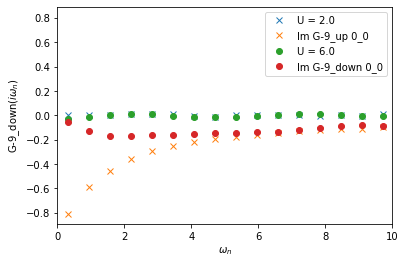

In [3]:
A1 = HDFArchive("results_one_band/half-U2.00.h5", 'r')
A2 = HDFArchive("results_one_band/half-U6.00.h5", 'r')

# Plot the Green's function of the last iteration
oplot(A1['G-9']['up'], 'x', label='U = 2.0')
oplot(A2['G-9']['down'], 'o', label='U = 6.0')

plt.xlim(0,10)

As you can see, the behavior of the imaginary part is very different for the two values of $U$. When
$U$ is small, the system is a metal and the imaginary part extrapolated to zero goes to a finite value.
Instead, for large $U$, the system is a Mott insulator and the imaginary part goes to zero. The reason
is that the extrapolation to zero is directly proportional to the density of states at the chemical
potential. If the system is gapped, the density is zero; if the system is a metal, there is spectral
weight and the density is finite. Therefore, even on the Matsubara axis, one has a way to decide if the
system is metallic or not.

Solution of exercise 3
----------------------

We now do the same for the self-energy.

(-30.0, 0.0)

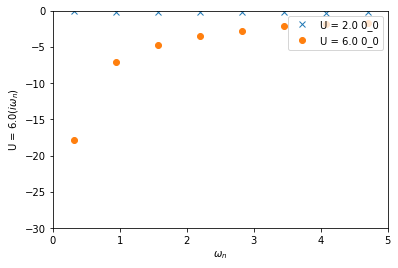

In [4]:
A1 = HDFArchive("results_one_band/half-U2.00.h5", 'r')
A2 = HDFArchive("results_one_band/half-U6.00.h5", 'r')

# Plot the self-energy of the last iteration
oplot(A1['Sigma-9']['up'].imag, 'x', name='U = 2.0')
oplot(A2['Sigma-9']['up'].imag, 'o', name='U = 6.0')

plt.xlim(0,5)
plt.ylim(-30,0)

Here the extrapolation to zero goes to zero for the metal and diverges in the insulator. In general, we expect that the
self-energy goes to zero linearly at small frequencies in a Fermi-liquid metal. As we will see below, the slope
tells something about the degree of correlation. In the Mott insulator, a gap open because of the development of a
pole in the self-energy. The manifestation of this pole is a diverging imaginary part of the self-energy a low frequencies
as is visible here.

Solution of exercise 4
----------------------

We estimate the derivative using the following approximation

$$
Z = \lim_{\omega_n \rightarrow 0} \Big( 1 - \frac{d\mathrm{Im} \Sigma(i\omega_n)}{di\omega_n} \Big)^{-1}
  \sim \Big( 1 - \frac{\mathrm{Im} \Sigma(i\omega_0)}{i\omega_0} \Big)^{-1}
$$

with $\omega_0 = \pi / \beta$ being the first Matsubara frequency.

Text(0, 0.5, 'Z')

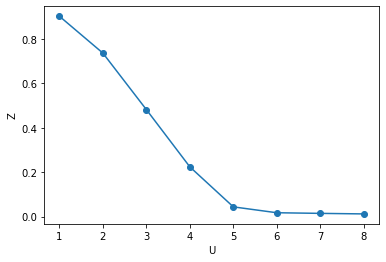

In [5]:
beta = 10
U_list = []
Z_list = []

for U in np.arange(1.0, 9.0):
    
    A = HDFArchive("results_one_band/half-U%.2f.h5"%U, 'r')
    Sigma = A['Sigma-9']
    
    Z = 1 / (1 - (Sigma['up'](0)[0,0].imag * beta / np.pi))
    U_list.append(U)
    Z_list.append(Z)
    
plt.plot(U_list, Z_list, '-o')
plt.xlabel('U')
plt.ylabel('Z')

Solution of exercise 5
----------------------

This is just the same script as we had earlier. We just add a couple of lines to extract $Z$.

In [ ]:
from triqs.gf import *
from triqs.plot.mpl_interface import *

class IPTSolver:

    def __init__(self, beta):

        self.beta = beta

        # Matsubara frequency
        self.g = GfImFreq(indices=[0], beta=beta, name='0')
        self.g0 = self.g.copy()
        self.sigma = self.g.copy()
        
        # Imaginary time
        self.g0t = GfImTime(indices=[0], beta = self.beta, name='G0t')
        self.sigmat = self.g0t.copy()
        
    def solve(self, U):

        self.g0t << Fourier(self.g0)
        self.sigmat << (U**2) * self.g0t * self.g0t * self.g0t
        self.sigma << Fourier(self.sigmat)

        # Dyson
        self.g << self.g0 * inverse(1.0 - self.sigma * self.g0)
        

t = 1.0
beta = 10
n_loops = 30

S = IPTSolver(beta = beta)

U_list2 = []
Z_list2 = []

for U in np.arange(0.0, 12.0):
    
    S.g << SemiCircular(2*t)
    for i in range(n_loops):

        S.g0 << inverse( iOmega_n - t**2 * S.g )
        S.solve(U = U)
    

    Z = 1 / (1 - (S.sigma(0)[0,0].imag * beta / np.pi))
    U_list2.append(U)
    Z_list2.append(Z)
    
    print(Z)
    
plt.plot(U_list2, Z_list2, '-o', label='IPT')
plt.plot(U_list, Z_list, '-x', label='CTQMC')
plt.xlabel('U')
plt.ylabel('Z')
plt.legend()

Solution of exercise 6
----------------------


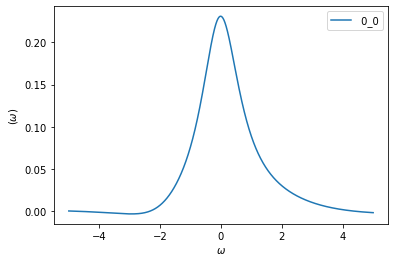

In [6]:
with HDFArchive("results_one_band/half-U4.00.h5", 'r') as A:
    g = A['G-9']['up']

g_real = GfReFreq(indices=[0], window=[-5,5])
g_real.set_from_pade(g)
oplot(-g_real.imag/pi)

The result is completely wrong. This is because of the noise in the Monte Carlo data. One would have to make much longer runs in order to reduce the error bars. The Pade approximation can be used only on very accurate data. When the noise is still quite large, one has to use different analytical continuation methods, like MaxEnt, which produces the following spectral function:

<img src="files/maxent_Aw.png">

However, TRIQS does not provide a MaxEnt package. Regardless of which package you use for MaxEnt, it is very important to remember that there are some important knobs with which one can play in MaxEnt that can substantially change the results, and so one must be very careful in its use!